<a href="https://colab.research.google.com/github/Gobikrishnan05/Machine-learning/blob/main/EDA_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving insta data.csv to insta data.csv


In [3]:
import pandas as pd
data = pd.read_csv('insta data.csv', encoding='latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [4]:
# Data manipulation and processing
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# NLP for text processing
from sklearn.feature_extraction.text import TfidfVectorizer



In [5]:
print(data.head())

# Check for missing values
print(data.isnull().sum())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [6]:
# Assuming no missing values in the dataset based on initial inspection
# Extract the features and target variable
X = data.drop(['Follows'], axis=1)  # Features
y = data['Follows']  # Target

# Extract numerical and text-based features separately
numerical_features = X[['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves',
                        'Comments', 'Shares', 'Likes', 'Profile Visits']]

text_features = X[['Caption', 'Hashtags']]

# Preprocess numerical features (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_features)

# Preprocess text features using TF-IDF (on Caption and Hashtags)
tfidf_caption = TfidfVectorizer(max_features=100)  # Limit to 100 features for simplicity
caption_vectors = tfidf_caption.fit_transform(text_features['Caption']).toarray()

tfidf_hashtags = TfidfVectorizer(max_features=100)
hashtag_vectors = tfidf_hashtags.fit_transform(text_features['Hashtags']).toarray()

# Combine numerical and text features into a single feature set
X_combined = np.hstack([X_scaled, caption_vectors, hashtag_vectors])


In [7]:
# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [8]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MAE: {mae_rf}, RMSE: {rmse_rf}, R2: {r2_rf}')


Random Forest MAE: 9.485, RMSE: 17.50505926868001, R2: 0.848918379533253


In [9]:
Linear = LinearRegression()
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
test_data_prediction = regressor.predict(X_test)
test_data_prediction

array([  6.92,  27.78,   2.32,  10.88,  18.54, 133.62,  15.04,   9.28,
        42.82,  15.64,  26.28,  65.06,   5.12,   4.62,   6.2 ,   2.86,
         4.98,   4.6 ,   3.02,  12.34,  43.7 , 125.96,  18.54,  12.9 ])

In [11]:
y_test = list(y_test)

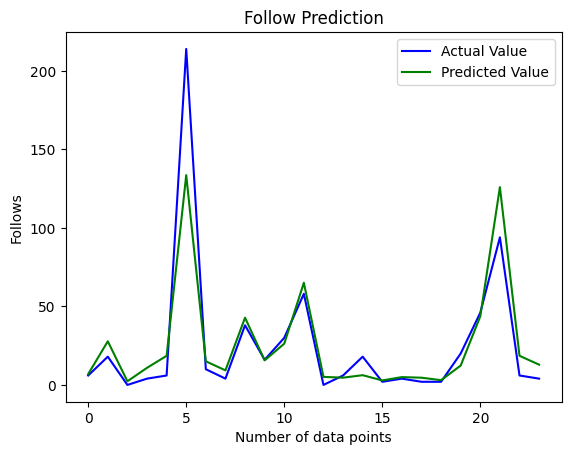

In [12]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label = 'Predicted Value')
plt.title('Follow Prediction')
plt.xlabel('Number of data points')
plt.ylabel('Follows')
plt.legend()
plt.show()

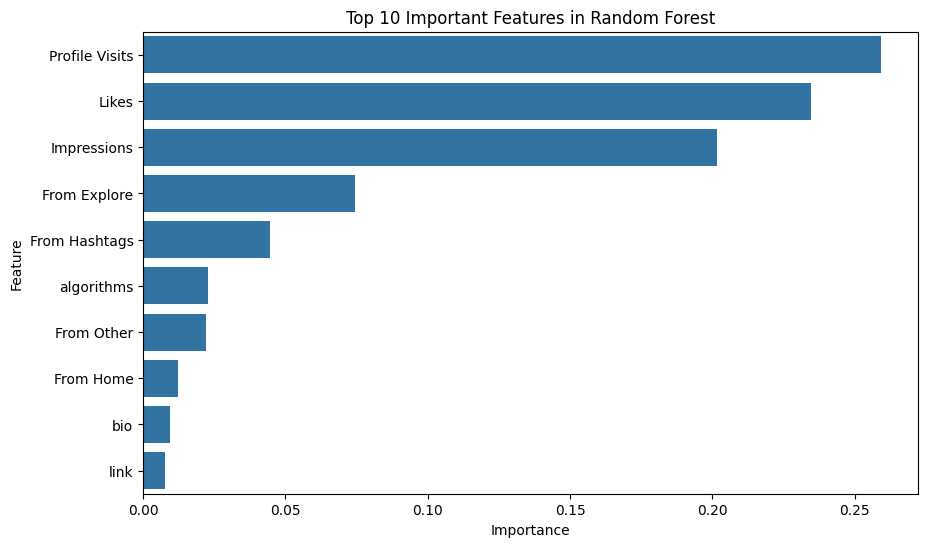

In [13]:
# Extract feature importance
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_names = numerical_features.columns.tolist() + tfidf_caption.get_feature_names_out().tolist() + tfidf_hashtags.get_feature_names_out().tolist()
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))  # Top 10 features
plt.title('Top 10 Important Features in Random Forest')
plt.show()


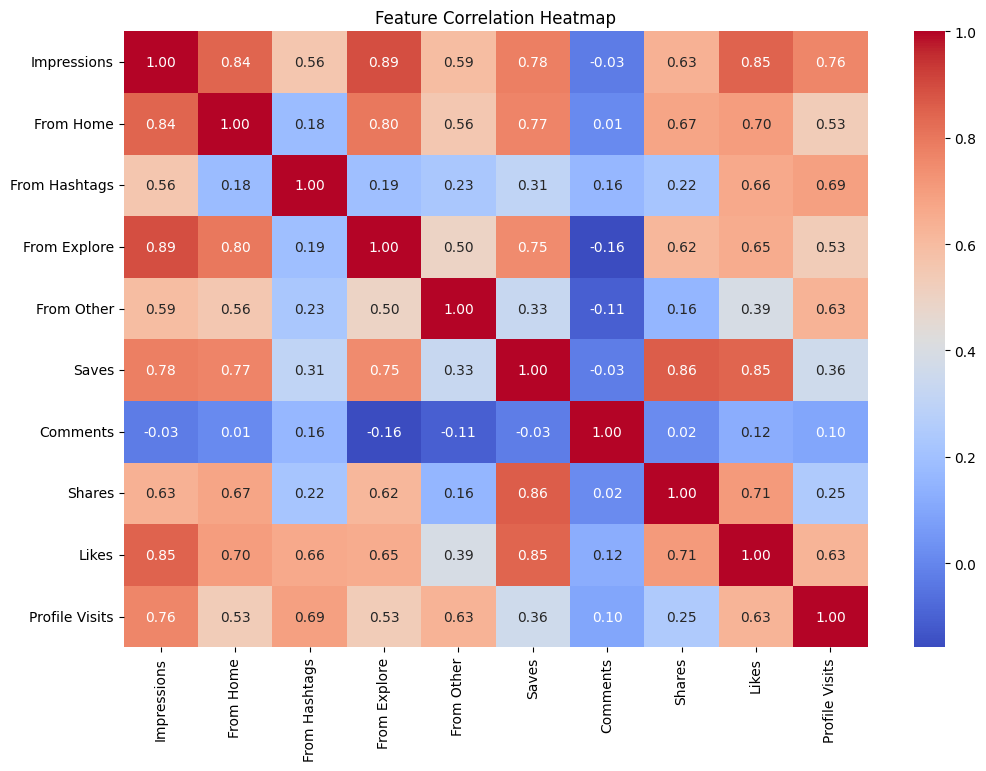

In [14]:
# If X_combined is a numpy array, first convert it to a DataFrame
if isinstance(X_combined, np.ndarray):
    X_combined = pd.DataFrame(X_combined)  # Create a DataFrame without specifying columns yet

# Now, select only the columns you want to analyze
# Note: Adjust these indices if the relevant columns aren't in positions 0 to 9
X_combined_subset = X_combined.iloc[:, :10]  # This assumes the first 10 columns are the desired ones

# Rename columns for clarity, if needed
X_combined_subset.columns = ['Impressions', 'From Home', 'From Hashtags', 'From Explore',
                             'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits']

# Compute the correlation matrix
correlation_matrix = X_combined_subset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



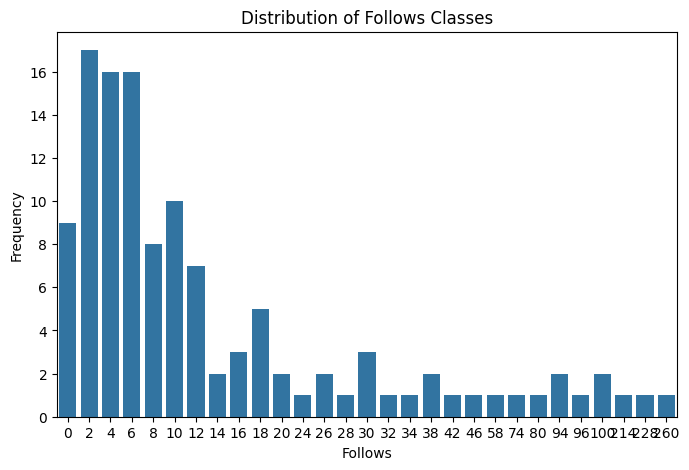

In [15]:
# Assuming 'Follows' is in your data as y
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title("Distribution of Follows Classes")
plt.xlabel("Follows")
plt.ylabel("Frequency")
plt.show()


**Now Using Support Vector Machine**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Set a threshold for 'Likes' to create a binary classification target
threshold = 150  # Define what counts as "high likes"
data['High Likes'] = (data['Likes'] > threshold).astype(int)

# Select features (X) and target (y)
X = data[['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
y = data['High Likes']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')  # You can also try 'rbf' or 'poly' kernels
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 83.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.83      0.91      0.87        22

    accuracy                           0.83        36
   macro avg       0.83      0.81      0.82        36
weighted avg       0.83      0.83      0.83        36



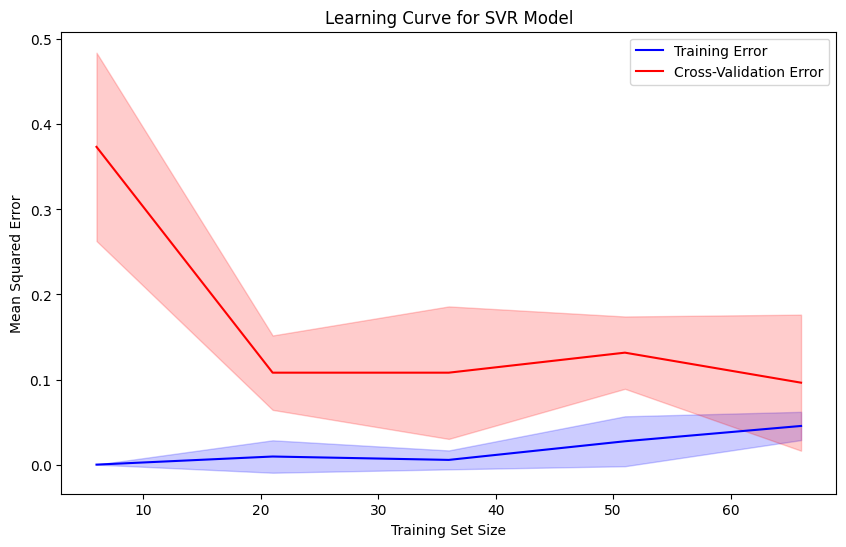

In [17]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of training and test scores
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-Validation Error', color='red')

# Plot shaded areas for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

plt.title('Learning Curve for SVR Model')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


**Now Using Naive Bayes Classifier**

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


# Display the first few rows to inspect the dataset
print(data.head())

# Discretize the target variable "Follows" into 3 categories (Low, Medium, High)
# You can use pd.qcut to create quantiles
data['Follows_Category'] = pd.qcut(data['Follows'], q=3, labels=['Low', 'Medium', 'High'])

# Display the first few rows with the new target category
print(data[['Follows', 'Follows_Category']].head())


   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [19]:
# Select features and target
X = data[['Impressions', 'Likes', 'Comments', 'Shares', 'Saves', 'Profile Visits']]  # Add more features as needed
y = data['Follows_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print(X_train.shape, X_test.shape)


(95, 6) (24, 6)


In [20]:
# Initialize the Naive Bayes classifier
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display a detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.62
              precision    recall  f1-score   support

        High       0.78      0.70      0.74        10
         Low       0.75      0.67      0.71         9
      Medium       0.29      0.40      0.33         5

    accuracy                           0.62        24
   macro avg       0.60      0.59      0.59        24
weighted avg       0.66      0.62      0.64        24



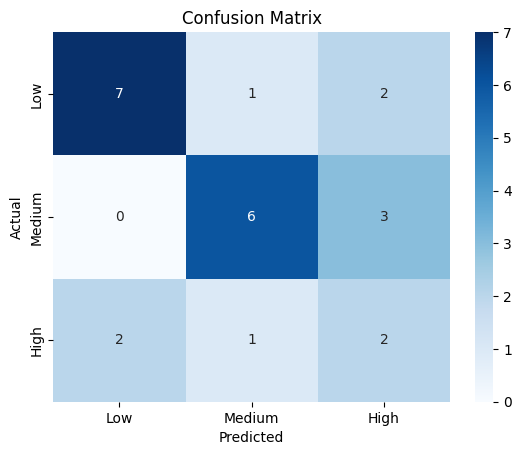

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
